In [3]:
from __future__ import division
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import f1_score, recall_score,precision_score , confusion_matrix, roc_curve, auc
%matplotlib inline

From Donatella:

We’d like to see all the relevant work you did (e.g.: data mining, models. etc) and what kind of thought went into leading you into the next step. We don’t want you to simply show what you thought was the best model to use for this data set.  In other words, we'd like for you to walk us through your work and reasoning behind why this was the best model based on any metric that you decided to use (e.g.: accuracy, precision, etc). The Notebook should contains at least 3 different models, including visualization. 

In [4]:
# removing categorical variables 

churn = pd.read_csv('data/churn.csv')
churn.pop('State')
churn.pop('Area Code')
churn.pop('Phone')

# binarizing the values

le = LabelEncoder()
le.fit(churn["Int'l Plan"])
churn["Int'l Plan"] = le.transform(churn["Int'l Plan"])

le = LabelEncoder()
le.fit(churn["VMail Plan"])
churn["VMail Plan"] = le.transform(churn["VMail Plan"])

le = LabelEncoder()
le.fit(churn["Churn?"])
churn["Churn?"] = le.transform(churn["Churn?"])

churn.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
churn.shape

(3333, 18)

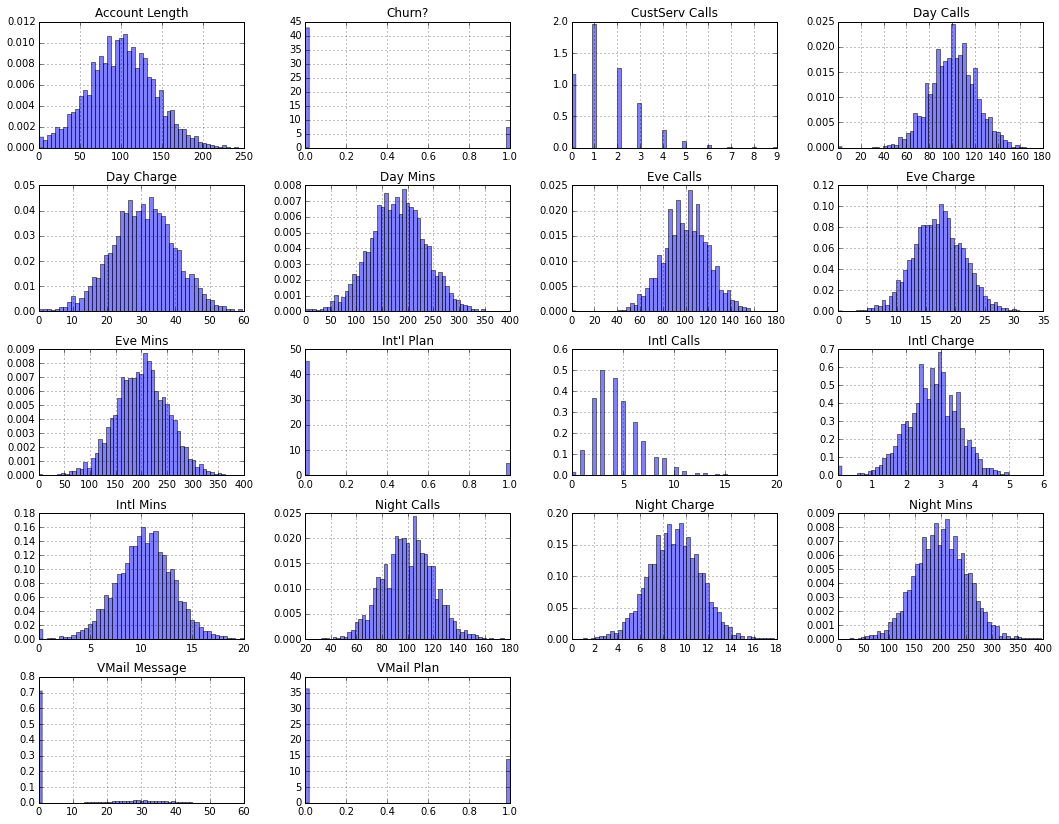

In [6]:
#data exploration with histograms:

churn.hist(alpha=0.5, bins=50, figsize=(18, 14) , normed = True);

In [7]:
churn_no = churn[churn['Churn?'] == 0]
churn_yes = churn[churn['Churn?'] == 1]

# seperating people who churned and people who didn't churn


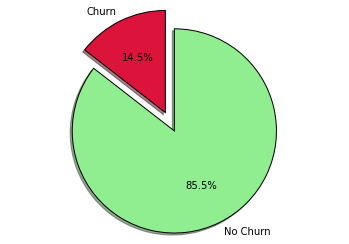

In [8]:
# pie chart
explode = (.2,0)
colors = ['crimson','lightgreen']
sizes = [len(churn_yes),len(churn_no)]
labels ='Churn', 'No Churn'
plt.pie(sizes,autopct='%1.1f%%', shadow=True,
        startangle=90, colors=colors , explode=explode,
        labels = labels);
plt.axis('equal');


In [9]:
y =churn.pop('Churn?').values
# setting my y values

In [10]:
X = churn.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
#trying out different classifiers / models
#any decision tree model seems to perform better than the rest. 
#the gini and entropy split helped picked he decisions better than other classifiers
#gradient boosted did better I believe is because the shortcomings of existing weak learners
#are compensated with other weak learners to become stronger.
# accuracy, precision, recall and F1 score also shows that gradient boosted models are doing better.
# plus the confusion matrix, ROC curve, area under he curve, kfolds, and probability calibration as you will see later shows
# that gradient boosted model performs better


def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    confusion_matrix(y_test, y_predict)
    matrix = confusion_matrix(y_test, y_predict)
    precision = matrix[1][1] / (matrix[1][1] + matrix[0][1]) 
    recall = matrix[1][1] / (matrix[1][1] + matrix[1][0])
    return model.score(X_test, y_test),  precision ,  recall

### sklearn's precision and recall didn't seem to work so I did my own using the confusion matrix

print "Model, Accuracy, Precision, Recall"
print "    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
#print "    SVM:", get_scores(SVC, X_train, X_test, y_train, y_test)
print "    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test) 
print "    Decision Tree:" ,  get_scores(DecisionTreeClassifier, X_train,X_test,y_train,y_test)
print "    Gradient Boost" , get_scores(GradientBoostingClassifier, X_train,X_test,y_train,y_test)
print "    AdaBoost" , get_scores(AdaBoostClassifier, X_train,X_test,y_train,y_test)
print "    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test)

Model, Accuracy, Precision, Recall
    Logistic Regression: (0.87170263788968827, 0.70370370370370372, 0.16101694915254236)
    Naive Bayes: (0.64988009592326135, 0.20999999999999999, 0.53389830508474578)
    Decision Tree: (0.92206235011990412, 0.72649572649572647, 0.72033898305084743)
    Gradient Boost (0.95683453237410077, 0.92708333333333337, 0.75423728813559321)
    AdaBoost (0.88968824940047964, 0.68571428571428572, 0.40677966101694918)
    Random Forest: (0.94724220623501199, 0.91111111111111109, 0.69491525423728817)


In [12]:
# choosing my final model

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print gb.score(X_test, y_test)

y_predict = gb.predict(X_test)

0.956834532374


In [13]:
#metrics
print "precision:", precision_score(y_test, y_predict)
print "recall:", recall_score(y_test, y_predict)
print "F1 score" , f1_score(y_test,y_predict)

precision: 0.927083333333
recall: 0.754237288136
F1 score 0.831775700935


/Users/user/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


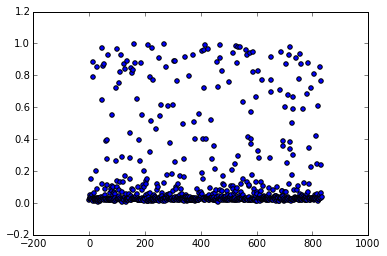

In [14]:
# probability of churning or leaving the service

churn_gdb = gb.predict_proba(X_test)[:,1]

plt.scatter(range(len(X_test)) , churn_gdb);

# probability states scatter plot shows that most people will not churn


Confusion matrix, without normalization
[[709   7]
 [ 29  89]]


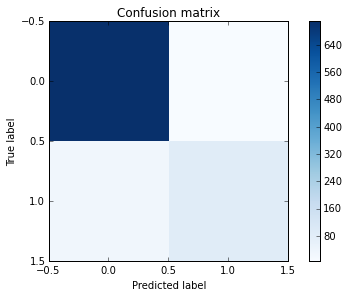

In [15]:
#using a default matrix from sklearn example
#it produces very low false positive and false negatives
# almost all predicted correct as the prediction shows.  

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # function for plotting confusion matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
# plotting the confusion matrix 
plt.show()

ROC AUC: 0.91


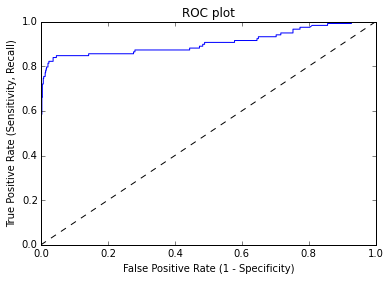

In [16]:
probabilities = gb.predict_proba(X_test)[:, 1]
# predicting 1's

fpr,tpr,threshold = roc_curve(y_test,probabilities)

# activating roc_curve 

roc_auc = auc(fpr, tpr)
print "ROC AUC: %0.2f" % roc_auc


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC plot")
plt.show()

#produces a very good area under the curve score


In [17]:
#gb.decision_function(X_test)

In [18]:
#gb.predict_proba(X_test)[:,1]

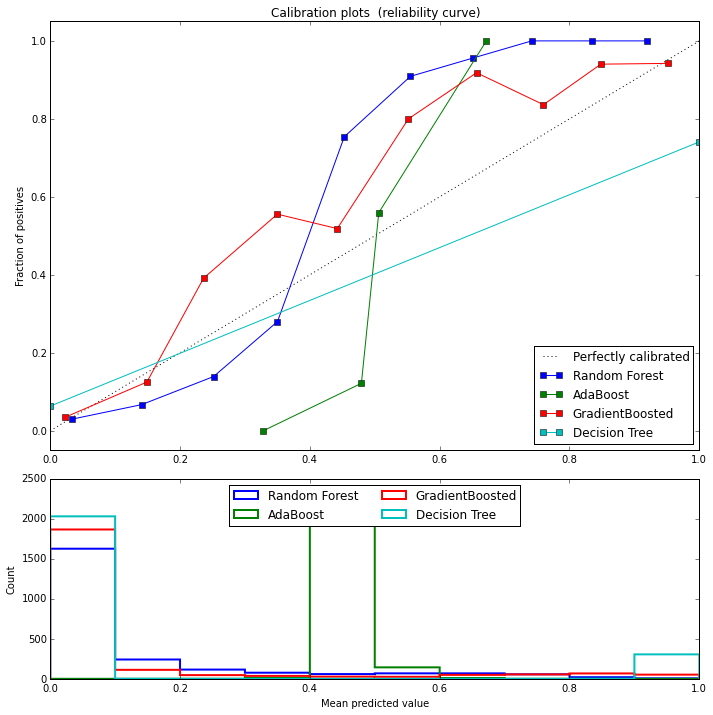

In [19]:
# This was a calibration example from sklearn.  

# I wanted to use a probability curve to get a confidence  on the prediction.

train_samples = 1000  # Samples used for training the models

import numpy as np
np.random.seed(10)
from sklearn.calibration import calibration_curve

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

#creating samples and indexing it 

rfc = RandomForestClassifier(n_estimators=1000)
ada = AdaBoostClassifier()
Gradient = GradientBoostingClassifier()
DecisionTree = DecisionTreeClassifier()

#calling my classifiers

###############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(rfc, 'Random Forest'),
                   (ada,'AdaBoost'),
                   (Gradient, 'GradientBoosted'),
                   (DecisionTree, 'Decision Tree')]:
    # iteratively calling my functions 
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
        # getting positive probabilities 
    else:  
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)
        # getting a proposed probability against the actual 
        
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)
# plotting functions 
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [20]:
# out of the top models, gradient boosted model is more closer to the line than the rest, which is the best peformer
# Decision tree performed the worst

In [21]:
# grid search to optimize the model 

# gb_grid = {'max_depth': [3, None],
#            'max_features': [1, 3, 10],
#            'min_samples_split': [1, 3, 10],  
#            'min_samples_leaf': [1, 3, 10],
#            'n_estimators': [25, 40, 50,100],
#            'random_state': [1,None]}

In [22]:
# gb_grid_search = GridSearchCV(cv=None,
#        estimator=GradientBoostingClassifier(),
#        fit_params={}, iid=True, n_jobs=1,
#        param_grid= gb_grid,
#        pre_dispatch='2*n_jobs', refit=True)

# gb_grid_search.fit(X_train, y_train)

# print "best parameters:",gb_grid_search.best_params_

# best_gb_model = gb_grid_search.best_estimator_

# print best_gb_model

In [23]:
X = churn.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

gb = GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=None, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=3, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)
gb.fit(X_train, y_train)

print gb.score(X_test, y_test)

0.968824940048


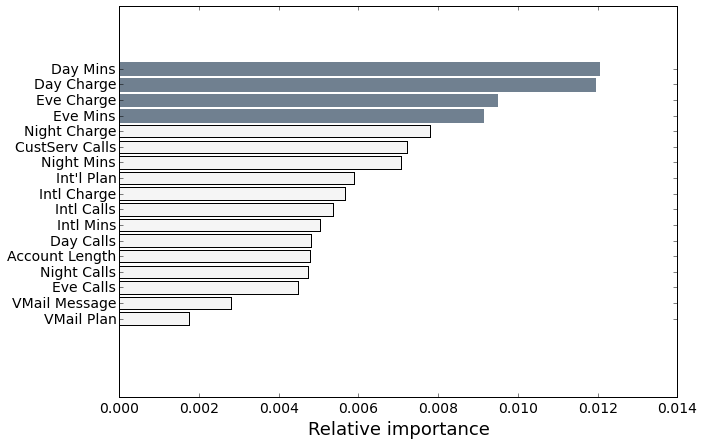

In [24]:
# doing a feature importance chart
# this varies, but you can see that day charge, customer calls, day minutes
# international calls were the biggest determining factor
# after that, the importance drops dramatically, which shows that there is 
# room to remove some of the less important features


col_names = ['Account Length',"Int'l Plan",'VMail Plan','VMail Message','Day Mins',
             'Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins',
             'Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

indices = np.argsort(gb.feature_importances_)
figure = plt.figure(figsize=(10,7))
barlist = plt.barh(range(len(gb.feature_importances_[indices])), gb.feature_importances_[indices],
         align='center', color = 'whitesmoke')

barlist[-1].set_color('slategrey')
barlist[-2].set_color('slategrey')
barlist[-3].set_color('slategrey')
barlist[-4].set_color('slategrey')

plt.yticks(range(len(gb.feature_importances_[indices])), np.array(col_names)[indices], fontsize=14)
plt.xticks(fontsize=14)
_ = plt.xlabel('Relative importance', fontsize=18)

In [25]:
kf = KFold(len(X), n_folds = 10, shuffle = True)
Acc = []
# the data is divided by 10 folds 

for train_index, test_index in kf:
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
# indexing the folds and applying it to the classifier 

    gb =GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=None, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=3, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)
    gb.fit(X_train, y_train)
    predict =gb.predict(X_test)
    Acc.append(gb.score(X_test,y_test))  

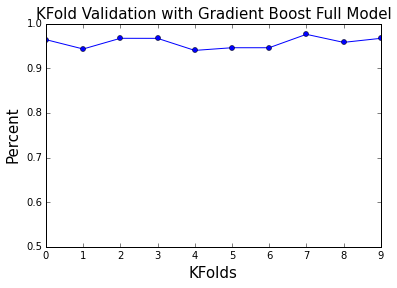

In [26]:
plt.plot(range(len(Acc)),Acc , marker = 'o', markersize = 5)
plt.xlabel("KFolds" , size = 15)
plt.ylabel("Percent", size = 15)
plt.ylim(0.5,1)
plt.title("KFold Validation with Gradient Boost Full Model", size = 15)
plt.show()

In [27]:
# creating a seperate saved file for feature selection

churned = pd.read_csv('data/churn.csv')

le = LabelEncoder()
le.fit(churned["Churn?"])
churned["Churn?"] = le.transform(churned["Churn?"])

churned_no = churned[churned['Churn?'] == 0]
churned_yes = churned[churned['Churn?'] == 1]

# Looking into the data a bit deeper:

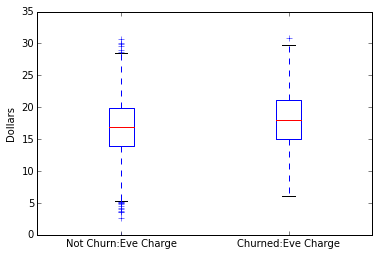

In [28]:
# people who churned faced higher charges
# distribution was relatively normal for not churn, but bimodal for people who churned

box = [churn_no['Eve Charge'],churn_yes['Eve Charge']]
#plt.violinplot(box)
plt.boxplot(box)
plt.ylabel('Dollars')
plt.xticks([1,2],['Not Churn:Eve Charge','Churned:Eve Charge'])
plt.show()

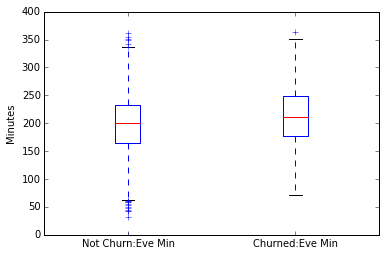

In [29]:
# people who churned faced higher charges
# distribution was relatively normal for not churn, but bimodal for people who churned

box = [churn_no['Eve Mins'],churn_yes['Eve Mins']]
#plt.violinplot(box)
plt.boxplot(box)
plt.ylabel('Minutes')
plt.xticks([1,2],['Not Churn:Eve Min','Churned:Eve Min'])
plt.show()

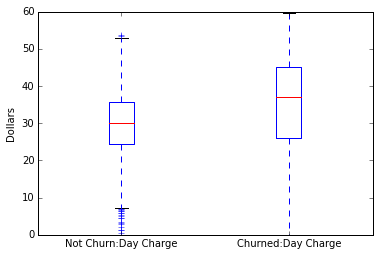

In [30]:
box = [churn_no['Day Charge'],churn_yes['Day Charge']]
#plt.violinplot(box)
plt.boxplot(box)
plt.ylabel('Dollars')
plt.xticks([1,2],['Not Churn:Day Charge','Churned:Day Charge'])
plt.show()

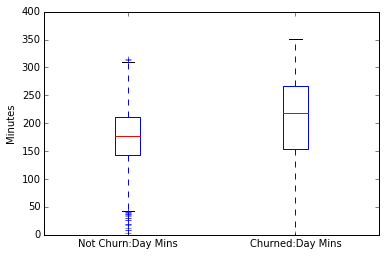

In [31]:
# people who left the service actually on average used the service more, but were hit with more charges because of it
# people should not be penalized for using the service more

box = [churn_no['Day Mins'],churn_yes['Day Mins']]
#plt.violinplot(box)
plt.boxplot(box)
plt.ylabel('Minutes')
plt.xticks([1,2],['Not Churn:Day Mins','Churned:Day Mins'])
plt.show()

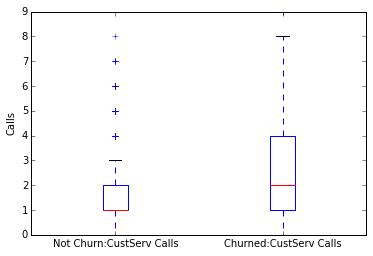

In [32]:
# on average, people who churned used customer service more often
# I assume their issues weren't resolved and had to call back multiple times

box = [churn_no['CustServ Calls'],churn_yes['CustServ Calls']]
#plt.violinplot(box)
plt.boxplot(box)
plt.ylabel('Calls')
plt.xticks([1,2],['Not Churn:CustServ Calls','Churned:CustServ Calls'])
plt.show()

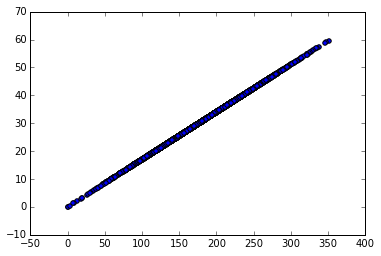

In [33]:
plt.scatter(churn['Day Mins'],churn['Day Charge']);

# theres a direction correlation between minutes and day charge.

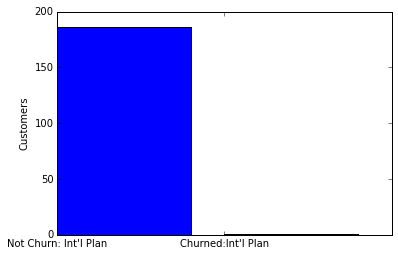

In [34]:
box = [len(churn_no[churn_no["Int'l Plan"]==1]),len([churn_yes[churn_yes["Int'l Plan"]==1]])]
plt.bar([1,2],box)
plt.xticks([1,2],["Not Churn: Int'l Plan ","Churned:Int'l Plan"])
plt.ylabel('Customers')
plt.show()

# people who churned didn't have an international plan, so it would be wise to incite people sign up for one
# or we can try to target people who are in need of an international plan, customer segmentation

In [35]:
# with trial/error and stepwise regression, I was able to reduce the model from 17 features to 12 and still have
# the same performance metrics as shown below

X = churn[["Int'l Plan",'VMail Message','Day Mins',
             'Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']]

X_train, X_test, y_train, y_test = train_test_split(X, y)


gb =GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=None, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=3, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)
gb.fit(X_train, y_train)

print gb.score(X_test, y_test)

y_predict = gb.predict(X_test)

0.962829736211


In [36]:
print "precision:", precision_score(y_test, y_predict)
print "recall:", recall_score(y_test, y_predict)
print "F1 score" , f1_score(y_test,y_predict)

# scores still stayed strong even though I removed features 

precision: 0.894736842105
recall: 0.801886792453
F1 score 0.845771144279


ROC AUC: 0.91


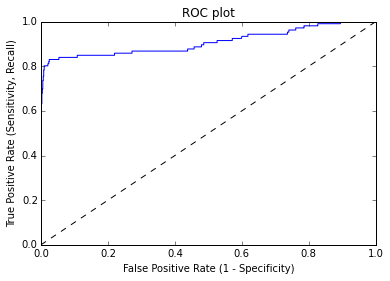

In [37]:
probabilities = gb.predict_proba(X_test)[:, 1]
# predicting 1's

fpr,tpr,threshold = roc_curve(y_test,probabilities)

# activating roc_curve 

roc_auc = auc(fpr, tpr)
print "ROC AUC: %0.2f" % roc_auc


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC plot")
plt.show()

Confusion matrix, without normalization
[[718  10]
 [ 21  85]]


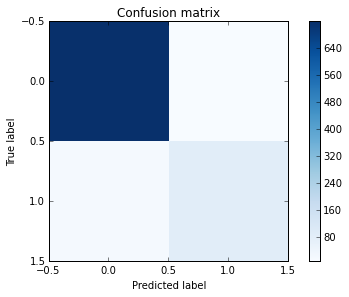

In [38]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # function for plotting confusion matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
# plotting the confusion matrix 
plt.show()

# prediction power stayed the same in reduced model for ROC curve and confusion matrix 

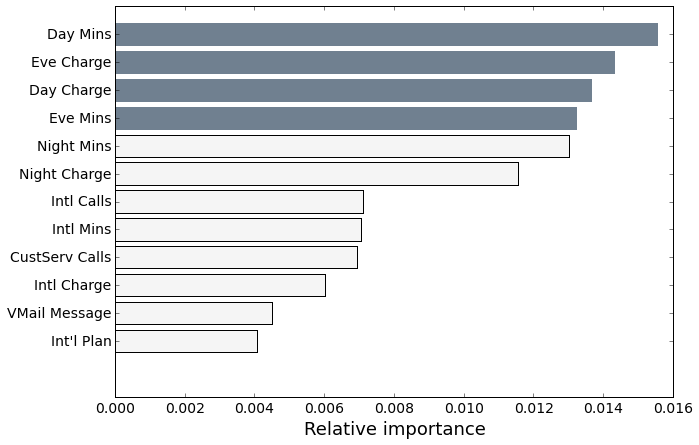

In [39]:
# feature importance varies slightly, but the strongest features in the reduced model are the same in the full model.
# any more features removed, the performance goes down.

# the decrease in feature importance is not as drastic in this reduced model

col_names = ["Int'l Plan",'VMail Message','Day Mins',
             'Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

indices = np.argsort(gb.feature_importances_)
figure = plt.figure(figsize=(10,7))
barlist = plt.barh(range(len(gb.feature_importances_[indices])), gb.feature_importances_[indices],
         align='center', color = 'whitesmoke')

barlist[-1].set_color('slategrey')
barlist[-2].set_color('slategrey')
barlist[-3].set_color('slategrey')
barlist[-4].set_color('slategrey')

plt.yticks(range(len(gb.feature_importances_[indices])), np.array(col_names)[indices], fontsize=14)
plt.xticks(fontsize=14)
_ = plt.xlabel('Relative importance', fontsize=18)

In [40]:
kf = KFold(len(X), n_folds = 10, shuffle = True)
Acc = []
# the data is divided by 10 folds 

for train_index, test_index in kf:
    X_train, X_test = X.values[train_index],X.values[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
# indexing the folds and applying it to the classifier 

    gb =GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=None, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=3, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)
    gb.fit(X_train, y_train)
    predict =gb.predict(X_test)
    Acc.append(gb.score(X_test,y_test))    
    

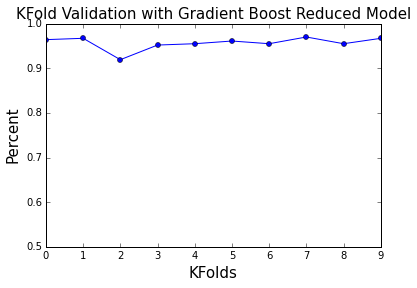

In [41]:
# kflolds shows a consistent prediction throughout the folds. which means I have a good model

plt.plot(range(len(Acc)),Acc , marker = 'o', markersize = 5)
plt.xlabel("KFolds" , size = 15)
plt.ylabel("Percent", size = 15)
plt.ylim(0.5,1)
plt.title("KFold Validation with Gradient Boost Reduced Model", size = 15)
plt.show()

### Summary and Recommendation:

### churn is already low, but to reduce churn:

- flat rate or unlimited plan has proven to work for other companies, you may lose some revenue in the beginning, but you are able to retain customers and generate more in the long run.

- Customer service could be looked into more to see why people who churned called multiple times

- International plans could be pushed more since it helped for retention or we can try to target people who are in need of an international plan, customer segmentation.

- gradient boosted model seemed to do the best, even though it only predicts on a time, not in parellel like random forest

# Sources:

Pie chart:

http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Scatter plot demo:

http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

Probability calibration:

http://scikit-learn.org/stable/modules/calibration.html

Confusion Matrix:

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Metrics:

http://scikit-learn.org/stable/modules/classes.html

Feature Importance:

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Kfolds:

http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html



In [42]:
names = ['Account Length',"Int'l Plan",'VMail Plan','VMail Message','Day Mins',
             'Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins',
             'Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

In [43]:
reduced = ["Int'l Plan",'VMail Message','Day Mins', 'Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

In [44]:
set(names).symmetric_difference(reduced)

{'Account Length', 'Day Calls', 'Eve Calls', 'Night Calls', 'VMail Plan'}

In [45]:
len(names)

17

In [46]:
len(reduced)

12

In [47]:
dropped= {'Account Length', 'Day Calls', 'Eve Calls', 'Night Calls', 'VMail Plan'}